In [5]:
#Importing Libraries
import pandas as pd
import numpy as np

#Loading Data
df = pd.read_csv(r'Downloads/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Fill missing values with the mode
df['job'].fillna(df['job'].mode()[0], inplace=True)

C:\Users\govin\AppData\Local\Temp\ipykernel_3104\1665648598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(df['job'].mode()[0], inplace=True)


In [7]:
df_encoded = pd.get_dummies(df, columns=['job', 'education', 'marital'], drop_first=True)
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Label Encode the target if it's categorical
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # converts 'yes'/'no' to 1/0

# One-hot encode other categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']  # add encoded target back

# Feature and target split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

C:\Users\govin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[11669   297]
 [ 1058   540]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.65      0.34      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



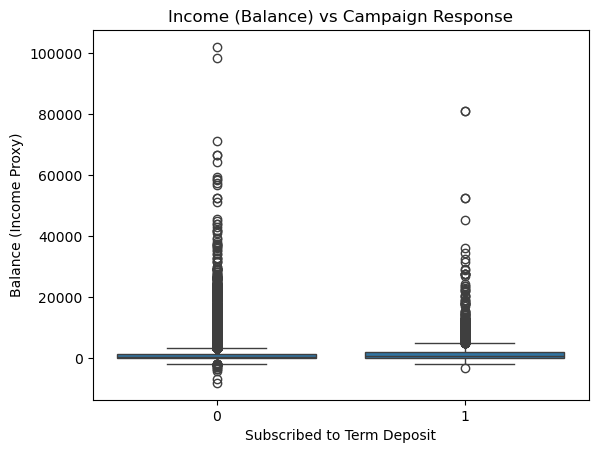

In [11]:
#Visualisation : Income VS Campaign Response
import matplotlib.pyplot as plt
import seaborn as sns

df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})
sns.boxplot(x='y', y='balance', data=df)
plt.title("Income (Balance) vs Campaign Response")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Balance (Income Proxy)")
plt.show()